# Zeros de funções

<div class="alert alert-block alert-success">
    <b>Notas de aula baseadas nos livros: </b> 
    <p>Cálculo Numérico - Aspectos Teóricos e Computacionais, das autoras Márcia A. G. Ruggiero e Vera L. R. Lopes
    <p>Algoritmos Numéricos do autor Fredericos Campos
</div>
    
Os métodos para resolver o problema $f(x)=0$ podem ser classificados em dois grandes grupos: 
- os métodos de encaixe e 
- os métodos de intervalo aberto.

Os primeiros caracterizam-se por definir, em cada iteração, um intervalo que contém a raiz e construir, para a iteração seguinte, outro intervalo encaixado neste e que continue a conter a raiz. 

Os intervalos, como aparecem encaixados uns nos outros, tem amplitudes sucessivamente menores. Como exemplo de método de encaixe temos o método da **Bisseção**.

No grupo dos métodos de intervalo aberto não é necessário definir um intervalo que contenha a raiz. O processo iterativo pode ser iniciado com uma única aproximação da raiz, ou mesmo duas. 

A convergência destes métodos depende dos valores iniciais atribuídos na primeira iteração. Deste grupo de métodos fazem parte o método do **Ponto Fixo**, o de **Newton-Raphson** e o da **Secante**.

Em geral, o problema de calcular uma raiz pode ser dividido em duas fases: 
1. isolamento da raiz, isto é, encontrar um intervalo $[a,b]$ que contenha uma, e somente uma, raiz de $f(x)=0$;
2. refinamento da raiz, ou seja, a partir de um valor inicial $x_0 \in [a,b]$ gerar uma sequência que ${x_0,x_1,\dots,x_k,\dots}$ convirja para uma raiz exata $\xi$ de $f(x)=0$.

Existem alguns métodos para cálculo de raízes polinomiais que não requerem que haja um prévio isolamento de cada raiz.

In [1]:
% A função roots do Matlab é um exemplo de método que não requer isolamento das raízes.

In [2]:
? roots

'roots' is a function from the file /usr/local/Cellar/octave/5.1.0_6/share/octave/5.1.0/m/polynomial/roots.m

 -- roots (C)

     Compute the roots of the polynomial C.

     For a vector C with N components, return the roots of the
     polynomial

          c(1) * x^(N-1) + ... + c(N-1) * x + c(N)

     As an example, the following code finds the roots of the quadratic
     polynomial

          p(x) = x^2 - 5.

          c = [1, 0, -5];
          roots (c)
          =>  2.2361
          => -2.2361

     Note that the true result is +/- sqrt(5) which is roughly +/-
     2.2361.

     See also: poly, compan, fzero.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.


In [3]:
c = [1, 0, -5];
roots (c)

ans =

  -2.2361
   2.2361



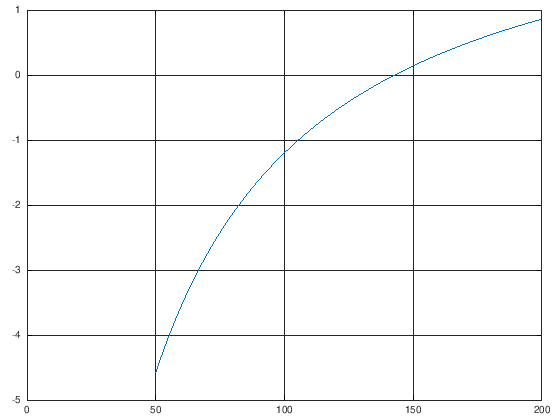

In [4]:
cd = 0.25; g = 9.81; v = 36; t = 4;
m = linspace(50,200);
fm = sqrt(g*m/cd).*tanh(sqrt(g*cd./m)*t)-v;
plot(m,fm), grid

## Isolamento de raízes

Nesta fase é feita uma análise teórica e gráfica da função $f(x)$. É importante ressaltar que o sucesso da fase de refinamento depende fortemente da precisão desta análise. Na análise teórica frenquentemente usaremos o **teorema de Bolzano**.

### Teorema de Bolzano

Seja $f(x)$ uma função contínua num intervalo $[a,b]$. Se $f(a) \cdot f(b) < 0$ então existe pelo menos um ponto $x=\alpha$ entre $a$ e $b$ que é raiz de $f(x)$.

<img src="img/raizes_xi.png" alt="" title="" />

**Obs:** Sob as hipóteses do teorema anterior, se $f'(x)$ existir e preservar o sinal em $(a,b)$, então este intervalo contém uma única raiz de $f(x)$.

<img src="img/derivadas_xi.png" alt="" title="" />

Uma forma de se isolar as raízes de $f(x)$ usando os resultados anteriores é tabelar $f(x)$ para vários valores de $x$ e analisar as mudanças de sinal de $f(x)$ e o sinal da derivada no intervalo em que $f(x)$ mudou de sinal.

**Exemplo 1:** Dada a função $f(x) = x^3-9x+3$, isolar três intervalos contendo as raízes de $f(x)$.

**Solução:**
Basta construir uma tabela de valores para $f(x)$ e considerar as mudanças de sinais:
\begin{array}{c|cccccccccccc}
	x	  & -\infty & -100 & -10 & -5 & -3 & -1 & 0 & 1 & 2 & 3 & 4 & 5 \\ \hline
	f(x)& - & - & - & - & + & + & + & - & - & + & + & +   \\ 
\end{array} 

Sendo $f(x)$ contínua em todos os reais, podemos concluir que os intervalos são $I_1=[=5,-3]$, $I_2=[0,1]$ e $I_3=[2,3]$.

**Exemplo 2:** Dada a função $f(x) = \sqrt{x}-5e^{-x}$, isolar  os intervalos contendo as 
raízes de $f(x)$.

**Solução:**
Construindo a tabela:
\begin{array}{c|ccccc}
    x	  & 0 & 1 & 2 & 3 & \cdots \\ \hline
    f(x)& - & - & + & + &     \cdots \\ 
\end{array} 

Ao avaliar $f'(x) = \frac{1}{2\sqrt{x}} + 5e^{-x}$, percebemos que $f'(x)>0$ para todo domínio, o que sugere que há uma única raiz no intervalo $I=[1,2]$.

**Obs 2:** Se $f(a) \cdot f(b) > 0$ nada é possível concluir sobre o intervalo de investigação das raízes.

<img src="img/f_nao_conclusiva.png" alt="" title="" />

A análise gráfica da função $f(x)$ ou da equação $f(x)=0$ é fundamental para se obter boas aproximações para a raiz.

Para tanto, é suficiente utilizar um dos seguintes processos:
1. esboçar o gráfico da função $f(x)$ e localizar as abscissas dos pontos onde a curva intercepta o eixo $x$;
2. a partir da função $f(x)=0$, obter a equação equivalente $g(x)=h(x)$, esboçar os gráficos das funções $g(x)$ e $h(x)$ no mesmo eixo cartesiano e localizar os pontos $x$ onde as duas curvas se interceptam, pois neste caso $f(\alpha)=0 \ g(\alpha) = h(\alpha)$;

**Exemplo 3:** 
Dada a equação $x^3-9x+3=0$, podemos obter a equação equivalente $x^3=9x-3$.

Nesse, caso temos $g(x)=x^3$ e $h(x)=9x-3$. Assim,

<img src="img/f_x.png" alt="" title="" />
    
**Exercício:** Trace os gráficos dessas funções no espaço reservado abaixo.

#### Convergência da raiz

Se uma raiz $\alpha$ estiver isolada em um dado intervalo $[a,b]$, então a próxima etapa consiste em gerar uma sequência ${x_0,x_1,\dots,x_k,\dots,\alpha} \in [a,b]$ que convirja para esta raiz exata $\alpha$ de $f(x)=0$.

##### Critério de parada

Antes de serem abordados os métodos iterativos que produzem tal sequência, é necessário definir um critério de parada. Existem duas interpretações para obter a raiz aproximada $x_k$:
$$|x_{k}-x_{k-1}| < \varepsilon$$
$$|f(x_{k})| < \varepsilon$$

onde $\varepsilon$ é a tolerância esperada. 

**Obs.**: vale ressaltar que essas conduzem a resultados não necessariamente iguais.

## Método da bissecção

Seja um função $f(x)$ contínua no intervalo $[a,b]$, sendo $\alpha$ a única raiz de $f(x)=0$ neste intervalo. 

O método da bisseção consiste em subdividir o intervalo ao meio a cada iteração e manter o subintervalo que contenha a raiz, ou seja, aquele em que $f(x)$ tenha sinais opostos nos extremos. 

Desse modo, obtém-se uma sequência de intervalos encaixados $\{[a_0,b_0],[a_1,b_1],[a_2,b_2],\dots,[a_k,b_k]\}$ nos quais

$$f(a_i) \cdot f(b_i) < 0, ~i=1,2,\dots,k.$$

**Exemplo 4:** Calcular a raiz aproximada da função, $f(x)=2x^3-\cos{(x+1)}-3=0$ que pertence ao intervalo $[-1,2]$, utilizando para isso 5 iterações do método da bisseção.

**Solução:**

1ª Iteração:
- $x_0  = \dfrac{a_0+b_0}{2} = \dfrac{-1+2}{2} = 0.5$
- $f(a_0) = f(-1)=-6 < 0$
- $f(b_0) = f(2) = 13.9899 > 0$
- $f(x_0) = f(0.5) = -2.8207 <0$
- $a_1 = x_0$
- $b_1 = b_0$

2ª Iteração:
- $x_1  = \dfrac{a_1+b_1}{2} = \dfrac{0.5+2}{2} = 1.25$
- $f(a_1) = f(0.5)=-2.82074 < 0$
- $f(b_1) = f(2) = 13.9899 > 0$
- $f(x_1) = f(1.25) = 1.5344 >0$
- $a_2 = a_1$
- $b_2 = x_1$

3ª Iteração:
- $x_2  = \dfrac{a_2+b_2}{2} = \dfrac{0.5+1.25}{2} = 0.875$
- $f(a_2) = f(0.5)=-2.82074 < 0$
- $f(b_2) = f(1.25) = 1.5344 > 0$
- $f(x_2) = f(0.875) = -1.3606 <0$
- $a_3 = x_2$
- $b_3 = b_2$
 
4ª Iteração:
- $x_3  = \dfrac{a_3+b_3}{2} = \dfrac{0.875+1.25}{2} = 1.0625$
- $f(a_3) = f(0.875)=-1.3606 < 0$
- $f(b_3) = f(1.25) = 1.5344 > 0$
- $f(x_3) = f(1.0625) = -0.12895<0$
- $a_4 = x_3$
- $b_4 = b_3$

\begin{array}{c|c|c|c|c|c|c}
    i & a_i & b_i & x_i & f(a_i) & f(b_i) & f(x_i) \\
    \hline
    0 & -1 & 2 & 0.5 & - & + & - \\
    1 & 0.5 & 2 & 1.25 & - & + & + \\
    2 & 0.5 & 1.25 & 0.875 & - & + &  - \\
    3 & 0.875 & 1.25 & 1.0625 & - & + & - \\
\end{array}

Por fim, a raiz aproximada é $x_4 = \dfrac{a_4+b_4}{2}=1.15625$.

### Estimativa do número de iterações

O método da bisseção é um dos poucos métodos em que é possível calcular o número de iterações a priori. 

Estabelecidos o intervalo inicial $[a,b]$ e a tolerância $\varepsilon$, o número de iterações $k$ é estimado da forma a seguir.

- $a_0 = a$ e $b_0=b$
- $b_1 - a_1 = \dfrac{b_0 - a_0}{2}$
- $b_2 - a_2 = \dfrac{b_1 - a_1}{2} = \dfrac{b_0 - a_0}{2^2}$
- $\vdots$
- $b_k - a_k = = \dfrac{b_{k-1} - a_{k-1}}{2} = \cdots = \dfrac{b_0 - a_0}{2^k} < \varepsilon$

e portanto

$$k > \log_2 \Big(\dfrac{b-a}{\varepsilon}\Big) $$

**Exemplo 5:** Estimar quantas iterações seriam necessárias para calcular a raiz aproximada do exemplo anterior considerando agora uma tolerância de $10^{-7}$.

**Solução:**

$$k > \log_2 \Big(\dfrac{b-a}{\varepsilon}\Big) = \log_2 \Big(\dfrac{2-(-1)}{10^{-7}}\Big) = \log_2 3 - (-7 \log_2 10) = \dfrac{\log 3}{\log 2} + 7 \dfrac{\log 10}{\log 2} = \dfrac{\log 3 + 7}{\log 2} = 24.8385$$

Resposta: O número $k$ de iterações é igual a 25.

### Considerações sobre o método da bissecção

Apesar de o método da bisseção ser robusto, ele não é eficiente devido à sua convergência lenta. 

Isso porque somente o sinal de $f(x_{k-1})$ é usado para o cálculo do próximo $x_k$, sem levar em consideração o seu valor. 

O método da bisseção é mais usado para reduzir o intervalo antes de usar um outro método de convergência mais rápida.

### Algoritmo da bissecção

1. Escolha as estimativas esquerda $a_k$ e direita $b_k$ para delimitar o intervalo de raízes de tal forma que a função mude o sinal no intervalo. Isto pode ser verificado garantindo que $f(a_k) \cdot f(b_k) < 0$.
2. A estimativa da raiz será dada por $x_k  = \dfrac{a_k+b_k}{2}$
3. Faça as seguintes avaliações para determinar em qual subintervalo a raiz está:
    - Se $f(a_k) \cdot f(x_k) < 0$, a raiz está no subintervalo inferior. Portanto, defina $b_k = x_k$ e retorne para o passo 2.
    - Se $f(a_k) \cdot f(x_k) > 0$, a raiz está no subintervalo superior. Portanto, defina $a_k = x_k$ e retorne para o passo 2.
    - Se $f(a_k) \cdot f(x_k) = 0$, a raiz é igual a $x_k$; termine o cálculo.

**Exercício:** Compare com o código [bissec.m](src/bissec.m) em matlab e teste o mesmo com o exemplo anterior.

In [5]:
addpath('src/');
f = @(x) 2*x^3-cos(x+1)-3;
format long
[raiz fx ea iter] = bissec(f,-1,2,0.00001,5)

raiz =  1.156250000000000
fx =    6.441913278559754e-01
ea =  8.108108108108109
iter =  5


## Método do Ponto Fixo

O método de ponto fixo pode ser definido, rearranjando a função $f(x) = 0$ de modo a que $x$ fique no lado esquerdo da equação: 

\begin{equation}
x = g(x)
\end{equation}

Esta transformação pode ser realizada tanto por manipulação algébrica ou por simples adição de $x$ em ambos os lados da equação.

Com essa equação é possível prever um novo valor de $x_{i+1}$ em função de um valor anterior de $x_i$. Assim, dada uma estimativa inicial da raiz $x_i$, a fórmula iterativa $x_{i+1} = g(x_i) $ pode ser utilizada para calcular uma nova estimativa para a raiz $x_{i+1}$.

Tal como vimos anteriormente, o erro aproximado $\varepsilon_a$ para esta equação pode ser determinada por:

\begin{equation}
	\varepsilon_a = \left|\dfrac{x_{i+1} - x_i}{x_{i+1}}\right| * 100\%
\end{equation}

**Exemplo 6:** Use o método de ponto fixo para encontrar a raíz da função $f(x) = e^{-x} - x$.

**Solução:** A função pode ser expressa diretamente na forma da equação $x = g(x)$ como sendo $x_{i+1} = e^{-x_i} $. 

Começando com o valor inicial de $x_0=0$, a aplicação desse método iterativo encontra uma solução próxima da real $x=0.56714329$ em dez iterações, conforme demonstrado na tabela abaixo.

\begin{array}{c|c|c|c|c|c|c}
    i & x_i & \left|\varepsilon_a\right|(\%) & \left|\varepsilon_v\right|(\%) & \left|\varepsilon_v\right|_i / \left|\varepsilon_v\right|_{i-1} \\
    \hline
    0 & 0.0000 &  & 100.000 &   \\
    1 & 1.0000 & 100.000 & 76.322 & 0.763  \\
    2 & 0.3679 & 171.828 & 35.135 & 0.460  \\
    3 & 0.6922 & 46.854 & 22.050 & 0.628  \\
    4 & 0.5005 & 38.309 & 11.755 & 0.533  \\
    5 & 0.6062 & 17.447 & 6.894 & 0.586  \\
    6 & 0.5454 & 11.157 & 3.835 & 0.556  \\
    7 & 0.5796 & 5.903 & 2.199 & 0.573  \\
    8 & 0.5601 & 3.481 & 1.239 & 0.564  \\
    9 & 0.5711 & 1.931 & 0.705 & 0.569  \\
    10 & 0.5649 & 1.109 & 0.399 & 0.566  \\
\end{array}

### Considerações sobre o método de Ponto Fixo

Observe que o erro relativo verdadeiro em percentual para cada iteração do exemplo em relação ao erro da iteração anterior é aproximadamente proporcional a um fator entre 0,5 e 0,6. Esta propriedade é chamada de convergência linear, sendo característica do método de ponto fixo.

A convergência do método de ponto fixo somente é garantida quando a derivada de $g(x)$ perto da raiz tiver magnitude menor que 1. Ou seja, $\left|g'(x)\right| < 1$.

## Método de Newton-Raphson

O método de Newton-Raphson é obtido geometricamente da seguinte forma:

Dado o ponto $(x_k,f(x_k))$ traçamos a reta $L_k(x)$ tangente à curva neste ponto:

$$L_k(x) = f(x_k) + f'(x_k)(x-x_k)$$

$L_k(x)$ é um modelo linear que aproxima a função $f(x)$ numa vizinhança de $x_k$.

Encontrando o zero de $L_k(x)$, obtemos:

$$L_k(x)=0 \Leftrightarrow x = x_k - \frac{f(x_k)}{f'(x_k)}$$

Fazemos então $x_{k+1} = x$, o método de Newton-Raphson é dado por:

$$x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)} $$

Observe a motivação geométrica na figura a seguir.

<img src="img/newton_raphson.png" alt="" title="" />

**Exemplo 7:** 
Dada $f(x)=x^2+x-6$ e $x_0=1.5$, aplique o método de Newton-Raphson e verifique que a sequência $x_k$ converge para $\alpha=2$.

**Solução:**

Explicitando a função de iteração:
$$f(x)=x^2+x-6$$
$$f'(x)=2x-+1$$
$$x_{k+1} = x_k - \dfrac{x_k^2 + x_k-6}{2x_k+1}$$

Temos, pois,

$$x_0=1.5$$
$$x_1=x_0 - \frac{f(x_0)}{f'(x_0)} = 2.0625$$
$$x_2=x_1 - \frac{f(x_1)}{f'(x_1)} = 2.00076$$ 
$$x_3=x_2 - \frac{f(x_2)}{f'(x_2)} = 2.00000$$

**Obs:** Verifique o que ocorre quando escolhemos $x_0=-4$.

### Considerações sobre o método de Newton-Raphson

A escolha do ponto $x_0$ é algo muito importante no método de Newton-Raphson. O teorema a seguir é extremamente útil nesse aspecto.

**Teorema:** Se $f(a)\cdot f(b) < 0$, e $f'(x)$ e $f''(x)$ forem não nulas e preservarem o o sinal em $[a,b]$, então partindo-se da aproximação inicial $x_0 \in [a,b]$ tal que $f(x_0)\cdot f''(x_0)>0$ é possível construir, pelo método de Newton-Raphson uma sequência $\{x_i\}$ que convirja para a raiz $\alpha$ de $f(x)=0$.

O método de Newton-Raphson tem ordem de convergência quadrática, isso significa que, a cada iteração, a quantidade de dígitos corretos da estimativa da raiz praticamente dobra.

## Método da Secante

Um problema potencial na implementação do método de Newton-Raphson, é a avaliação da derivada - há certas funções cujas derivadas podem ser difíceis ou inconvenientes para calcular. Para estes casos, a derivada pode ser aproximada por uma diferença finita regressiva:

\begin{equation}
f'(x_i) \approxeq \dfrac{f(x_{i-1}) - f(x_i)}{x_{i-1} -x_i}
\end{equation}

Substituindo esta aproximação pela equação do método de Newton-Raphson temos:

\begin{equation}
x_{i+1} = x_i - \dfrac{f(x_i)(x_{i-1} - x_i)}{f(x_{i-1}) -f(x_i)}
\end{equation}

### Considerações sobre o método da Secante

Note que este método requer duas estimativas iniciais de $x$, mas não exige nenhuma expressão analítica da derivada.

In [6]:
addpath('src/');
f = @(x) x^2+x-6;
df= @(x) 2*x+1;
[raiz ea iter] = newtraph(f,df,-4.0,0.00001,50)

    newtraph at line 27 column 5
raiz = -3.000000000000000
ea =    5.906386491005832e-11
iter =  5


In [7]:
f(1.5)

ans = -2.250000000000000


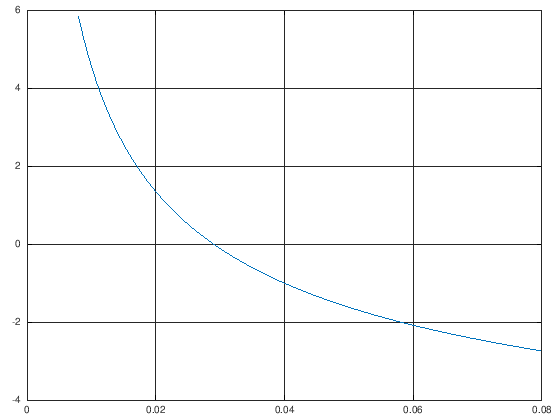

In [8]:
rho = 1.23;
mu = 1.79e-5;
D = 0.005;
V = 40;
e = 0.0015/1000;

Re = rho*V*D/mu;

g = @(f) 1./sqrt(f) + 2.*log10(e./(3.7.*D) + 2.51./(Re.*sqrt(f)));
f = linspace(0.008,0.08);
g_f = g(f);
plot(f, g_f), grid

In [9]:
addpath('src/');
dg = @(f) -2/log(10)*1.255/Re*f^(-3/2)/(e/D/3.7+2.51/Re/sqrt(f))-0.5/f^(3/2);
[f ea iter] = newtraph(g, dg, 0.008)

    newtraph at line 18 column 1
    newtraph at line 19 column 1
    newtraph at line 27 column 5
f =    2.896781017144046e-02
ea =    6.870124166104233e-06
iter =  6


In [10]:
fzero(g, 0.008)

    @<anonymous> at line 1 column 21
    fzero at line 181 column 10
    @<anonymous> at line 1 column 21
    fzero at line 181 column 10
ans =    2.896781017144057e-02


In [11]:
[raiz fx ea iter] = bissec(g,0.008, 0.08)

    bissec at line 20 column 1
    bissec at line 21 column 1
    bissec at line 37 column 5
raiz =    2.896780204772949e-02
fx =    9.370927003260476e-07
ea =    5.925937241305384e-05
iter =  22
